# LOAN Predictor
By Snehal Bedmutha

In [1275]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


borrower_table = pd.read_csv("loan_challenge_data/borrower_table.csv")
loan_table = pd.read_csv("loan_challenge_data/loan_table.csv")

In [1276]:
borrower_table.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [1277]:
loan_table.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


We merge the two tables for analysis.

In [1278]:
result = pd.merge(borrower_table,
                 loan_table[['loan_id', 'loan_purpose', 'date','loan_granted','loan_repaid']],
                 on='loan_id')
result.head()


,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [1279]:
## Count of loan_repaid and not paid
result.groupby('loan_repaid').count()


,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted
loan_repaid,,,,,,,,,,,,,,,
0.0,16948,16948,7922,7922,16948,16201,16948,16948,16948,16948,16948,16948,16948,16948,16948
1.0,30706,30706,13943,13943,30706,30550,30706,30706,30706,30706,30706,30706,30706,30706,30706


Around 47k loans were sanctioned, amongst them around 17k loans went bad. Our agenda is to fix this problem.

In [1280]:
## Fill the NA values in the table
result = result.fillna(2)

In [1281]:
df1 = result

In [1282]:
#Create new loan_granted_model marking the unpaid loans as zeros
df1.loc[(df1.loan_granted ==1),'loan_granted_new'] = 1
df1.loc[(df1.loan_granted ==0),'loan_granted_new'] = 0


df1.loc[(df1.loan_granted ==1)&(df1.loan_repaid ==0.0) ,'loan_granted_new'] = 0


In [1283]:
##Remove NAs from Data
df1 = df1.fillna(1)

In [1284]:
df1

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,loan_granted_new
0,289774,1,2.0,2.0,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,2.0,0.0
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,2.0,0.0
2,135565,1,2.0,2.0,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,2.0,0.0
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,2.0,0.0
5,423171,1,2.0,2.0,6100,0.53,6163,5298,1,29500,24,1,other,2012-11-07,1,1.0,1.0
6,568977,1,2.0,2.0,600,0.89,305,1456,0,0,50,2,emergency_funds,2012-10-12,0,2.0,0.0
7,200139,1,2.0,2.0,4000,0.57,602,2757,1,31700,36,8,business,2012-09-19,1,0.0,0.0
8,991294,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,3,emergency_funds,2012-12-04,1,1.0,1.0
9,875332,0,1.0,0.0,4300,0.83,722,892,1,5400,32,7,business,2012-01-20,1,1.0,1.0


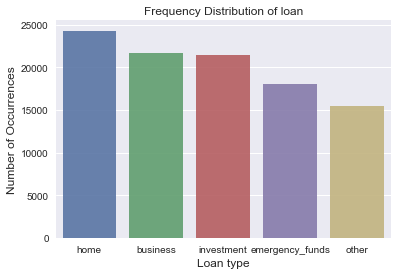

In [1286]:
%matplotlib inline
type_count = df1['loan_purpose'].value_counts()
sns.set(style="darkgrid")
sns.barplot(type_count.index, type_count.values, alpha=0.9)
plt.title('Frequency Distribution of loan')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan type', fontsize=12)
plt.show()


In the above plot above, the variable loan_type had maximum transactions for “home loan” and minimum for “Other” Category.

In [1287]:
## We will have create dummies for Loan Type Categorical variable
df1 = pd.get_dummies(df1, columns=['loan_purpose'],drop_first=False)


In [1288]:
#keep a copy of the previous dataframe and work on the new copy
df =df1

In [1289]:
# Make the date column readable
df['date'] = pd.to_datetime(df1['date'])


In [1290]:
df['date'].describe()


count                  101100
unique                    260
top       2012-03-27 00:00:00
freq                      500
first     2012-01-02 00:00:00
last      2012-12-28 00:00:00
Name: date, dtype: object

In [1291]:
#Extract month for date
df['month'] = df['date'].dt.month


Text(0.5, 1.0, 'Loans Funded per month')

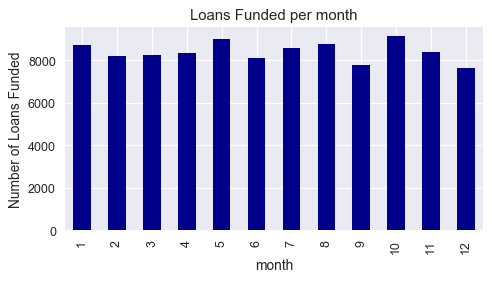

In [1292]:
plt.figure(figsize=(6,3), dpi=90)
df['date'].dt.month.value_counts().sort_index().plot.bar(color = 'darkblue')
plt.xlabel('month')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per month')


In above plot, I can see that the loans have approximately similar distribution throughout the year over different months. This shouId that it can a good variable to split the data into train and test based on months to have maximum realistic approach while training the model.

Now, lets split the data into train and test (90%-10%).

In [1293]:
train = df.loc[df['month'] <  df['month'].quantile(0.9)]
test =  df.loc[df['month'] >= df['month'].quantile(0.9)]


Lets drop of the month and date column now as they were not known until the loan was granted
I will also remove the loan granted column and the id column. We will also have to delete the loan repaid column as that is what want to identify through our model.


In [1294]:
train = train.drop(['month','date','loan_granted','loan_id','loan_repaid'] ,axis = 1)
test = test.drop(['month','date','loan_granted','loan_id','loan_repaid'] ,axis = 1)



Exploratory analysis of variables on data where the loan was granted (loan_repaid in (0.0,1.0)).
These plots will show the relationship of the most relevant features with the loan_granted (dependent) variable.

In [1295]:
df2 = df.loc[(df['loan_repaid'] == 0) | (df['loan_repaid'] == 1)]

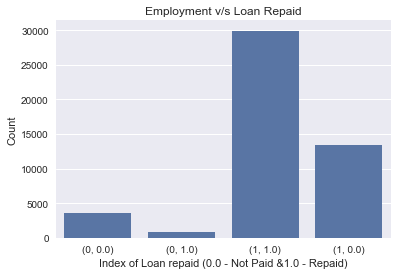

In [1296]:

X = df2.groupby('is_employed')['loan_repaid'].value_counts()
fig1=sns.barplot(x = X.index, y = X.values, color='#5975A4', saturation = 1)
plt.ylabel("Count")
plt.xlabel("Index of Loan repaid (0.0 - Not Paid &1.0 - Repaid)")
plt.title("Employment v/s Loan Repaid") 
plt.show(fig1)



I can see from Employment v/s Loan Repaid plot that if the borrower is employed he is most likely to return the loan as compared to the other scenario.

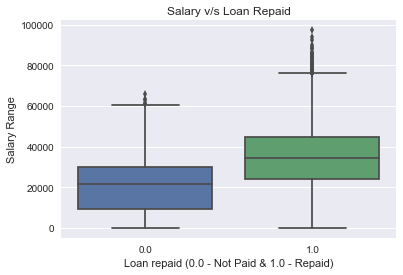

In [1297]:
fig2=sns.boxplot(df2['loan_repaid'],df2['yearly_salary'])
plt.ylabel("Salary Range")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Salary v/s Loan Repaid") 
plt.show(fig2)



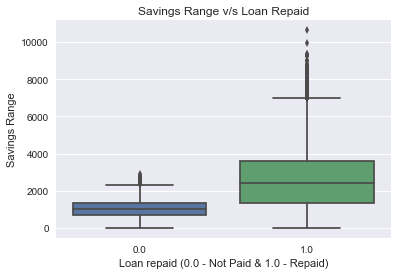

In [1298]:
fig3=sns.boxplot(df2['loan_repaid'],df2['saving_amount'])
plt.ylabel("Savings Range")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Savings Range v/s Loan Repaid") 
plt.show(fig3)


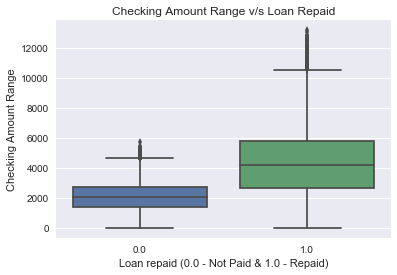

In [1299]:
fig4=sns.boxplot(df2['loan_repaid'],df2['checking_amount'])
plt.ylabel("Checking Amount Range")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Checking Amount Range v/s Loan Repaid") 
plt.show(fig4)



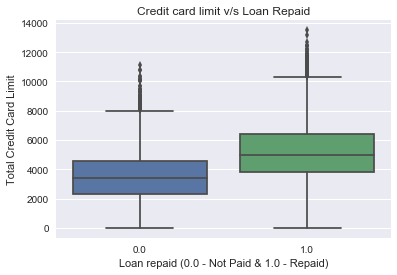

In [1300]:
fig5=sns.boxplot(df2['loan_repaid'],df2['total_credit_card_limit'])
plt.ylabel("Total Credit Card Limit")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Credit card limit v/s Loan Repaid") 
plt.show(fig5)


The above plots show that, higher the financial status of the person ( Salary, Bank balance, Credit limit) the higher is the chance that he will repay the loan. Thus they indicate a linear relationship with the dependent variable.

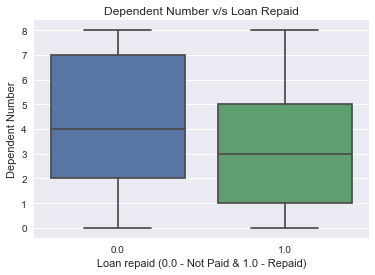

In [1301]:
fig8=sns.boxplot(df2['loan_repaid'],df2['dependent_number'])
plt.ylabel("Dependent Number")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Dependent Number v/s Loan Repaid") 
plt.show(fig8)


In above plot, It shows that if the number of dependents are more the borrower is more likely to default.

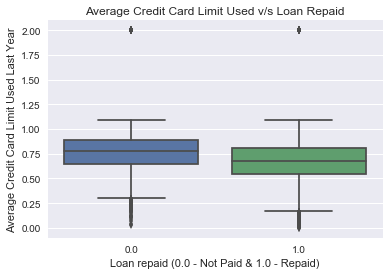

In [1302]:
fig6=sns.boxplot(df2['loan_repaid'],df2['avg_percentage_credit_card_limit_used_last_year'])
plt.ylabel("Average Credit Card Limit Used Last Year")
plt.xlabel("Loan repaid (0.0 - Not Paid & 1.0 - Repaid)")
plt.title("Average Credit Card Limit Used v/s Loan Repaid") 
plt.show(fig6)


In the above figure, the Average Credit Card Limit Used is slightly higher for borrowers who didn’t repay the loan.
Now that I have seen the variety of features with the target variable (“loan_granted”), I have to check whether collinearity is present amongst input features.


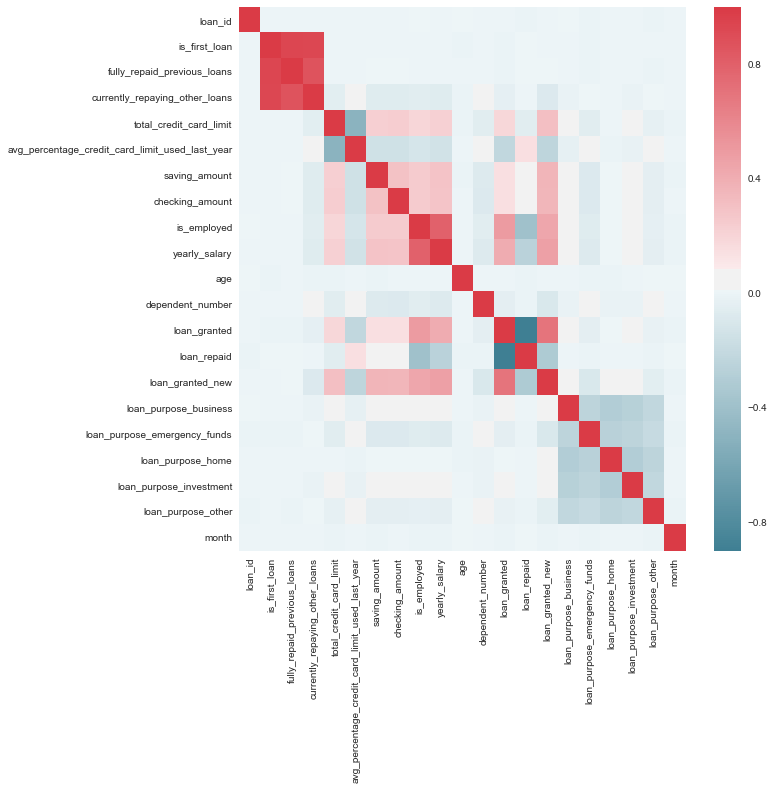

In [1340]:
## Correlation plot of Data

plt.figure(figsize=(10,10)) 

s=sns.heatmap(df1.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True))


I see that the variables is_first_loan, fully_repaid_previous_loans, currently_repaying_other_loans are highly correlated so I will have to figure out which ones are the least valuable amongst them for deletion. Similar observations are seen with is_employed and yearly_salary.

In [1303]:
X_train = train.drop(['loan_granted_new'] ,axis=1)


In [1304]:
Y_train = train['loan_granted_new']

In [1305]:
X_test = test.drop(['loan_granted_new'] ,axis=1)

In [1306]:
Y_test = test['loan_granted_new']

## Select most important variables

In [1307]:
linear_dep = pd.DataFrame()


In [1308]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(Y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])


In [1309]:
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), Y_train.loc[mask])




In [1310]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)


In [1311]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)


In [1312]:
linear_dep


,variable,pearson_corr,F,p_value
0,yearly_salary,0.467968,23837.078018,0.000000e+00
1,is_employed,0.439039,20299.033032,0.000000e+00
2,saving_amount,0.363144,12913.692917,0.000000e+00
3,checking_amount,0.359518,12618.990048,0.000000e+00
4,total_credit_card_limit,0.310884,9095.261718,0.000000e+00
5,avg_percentage_credit_card_limit_used_last_year,-0.235993,5013.706550,0.000000e+00
6,loan_purpose_emergency_funds,-0.095157,776.790405,3.518020e-170
7,dependent_number,-0.094194,761.010089,8.843833e-167
8,currently_repaying_other_loans,-0.077564,514.538640,1.421763e-113
9,loan_purpose_business,0.063358,342.630951,2.411615e-76


I see that “yearly_salary” and “is_employed” both hold the highest relation with target variable, therefore, I will keep both of them for now. However, amongst “is_first_loan”, “fully_repaid_previous_loans”, “currently_repaying_other_loans”, I will only keep “currently_repaying_other_loans” as that is relatively the most significant variable. We will also remove age as it doesn't have any relationship with the target variable.

In [1313]:
## Remove the unwanted variables
X_train =X_train.drop(['is_first_loan', 'fully_repaid_previous_loans','is_first_loan','age'], axis=1)
X_test =X_test.drop(['is_first_loan', 'fully_repaid_previous_loans','is_first_loan','age'], axis=1)



In [1314]:
def score_calculater(indicator,model,col_name):
    if indicator == 'bank':
        loss_data = result.loc[(result[col_name] == 1) & (result['loan_repaid'] == 0)]
        score_data = result.loc[(result[col_name] == 1) & (result['loan_repaid'] == 1)]
        score = score_data[col_name].count()
        loss = loss_data[col_name].count()
        total_profit_model = score - loss
        return total_profit_model
    else:
        indicator == 'model'
        output = model.predict(data_main)
        output = np.around(output)
        result[col_name] = output
        loss_data = result.loc[(result[col_name] == 1) & (result['loan_repaid'] == 0)]
        score_data = result.loc[(result[col_name] == 1) & (result['loan_repaid'] == 1)]
        score = score_data[col_name].count()
        loss = loss_data[col_name].count()
        total_profit_model = score - loss
        return total_profit_model

In [1315]:
# Logistic Regression Model
logreg = LogisticRegression(n_jobs=1, C=10000)

logreg.fit(X_train, Y_train)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1316]:
# Logistic Regression Output
y_pred_log_red = logreg.predict(X_test)

In [1317]:
y_pred_log_red

array([0., 0., 1., ..., 0., 1., 0.])

In [1318]:
print('Testing accuracy %s' % accuracy_score(Y_test, y_pred_log_red))
print('Testing F1 score: {}'.format(f1_score(Y_test, y_pred_log_red, average = 'weighted')))
print('Classification_report'+classification_report(Y_test, y_pred_log_red))
print('Area Under the Curve') 
print(roc_auc_score(Y_test, y_pred_log_red))

Testing accuracy 0.8048113383477342
Testing F1 score: 0.8032988720856865
Classification_report             precision    recall  f1-score   support

        0.0       0.85      0.87      0.86     11185
        1.0       0.69      0.65      0.67      4902

avg / total       0.80      0.80      0.80     16087

Area Under the Curve
0.7623440534156549


In [1319]:
## Now lets see how our model performs on the entire data
data_main = df.drop(['date','loan_granted','loan_id','loan_repaid','month','loan_granted_new','is_first_loan', 'fully_repaid_previous_loans','is_first_loan','age'],axis=1)


In [1320]:
Score_lg = score_calculater('model',logreg,'pred_lg')

In [1321]:
Score_lg

19870

These are the total profit points due to Logistic Regression Model.

In [1322]:
Total_profit_bank = score_calculater('bank',0,'loan_granted')
Total_profit_bank

13758

These are the total profit points without the model. Therefore our profit is much higher than the banks profit.

In [1323]:
## Random Forest Model
# Instantiate model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(X_train, Y_train);


In [1324]:
# Random Forest Output
y_pred_rf = rf.predict(X_test)

In [1325]:
# Rounding output to 0s and !s
y_pred_rf = np.around(y_pred_rf)

In [1326]:
y_pred_rf

array([0., 1., 1., ..., 0., 1., 0.])

In [1327]:
print('Testing accuracy %s' % accuracy_score(Y_test, y_pred_rf))
print('Testing F1 score: {}'.format(f1_score(Y_test, y_pred_rf, average = 'weighted')))
print('Classification_report'+classification_report(Y_test, y_pred_rf))
print('Area Under the Curve') 
print(roc_auc_score(Y_test, y_pred_rf))

Testing accuracy 0.8361409834027476
Testing F1 score: 0.8398094295207156
Classification_report             precision    recall  f1-score   support

        0.0       0.92      0.84      0.88     11185
        1.0       0.69      0.83      0.76      4902

avg / total       0.85      0.84      0.84     16087

Area Under the Curve
0.8344929596396934


In [1328]:
total_profit_rf = score_calculater('model',rf,'pred_rf')

These are the total profit points for Random Forest Model which is way more than 13758 points of bank.

In [1329]:
#Bagging Model
bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)


In [1330]:
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [1331]:
#Bagging Model output
y_bag = bagging.predict(X_test)


In [1332]:
# Rounding probabilities to 0s and 1s
y_bag = np.around(y_bag)

In [1333]:
print('Testing accuracy %s' % accuracy_score(Y_test, y_bag))
print('Testing F1 score: {}'.format(f1_score(Y_test, y_bag, average = 'weighted')))
print('Classification_report'+classification_report(Y_test, y_bag))
print('Area Under the Curve') 
print(roc_auc_score(Y_test, y_bag))

Testing accuracy 0.7807546466090632
Testing F1 score: 0.7734307011134403
Classification_report             precision    recall  f1-score   support

        0.0       0.82      0.88      0.85     11185
        1.0       0.67      0.54      0.60      4902

avg / total       0.77      0.78      0.77     16087

Area Under the Curve
0.7139894183483994


In [1334]:
total_profit_bag = score_calculater('model',bagging,'pred_bag')

In [1335]:
total_profit_bag

19709

These are the total profit points for Bagging Model which is way more than 13758 points of bank.

In [1336]:
# Gradient Boosting Model
clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1,
      max_depth = 1, random_state = 10)
clf.fit(X_train, Y_train)
y_boost = clf.predict(X_test)


In [1337]:
# Gradient Boosting Output
y_boost = np.around(y_boost)

In [1338]:
print('Testing accuracy %s' % accuracy_score(Y_test, y_boost))
print('Testing F1 score: {}'.format(f1_score(Y_test, y_boost, average = 'weighted')))
print('Classification_report'+ classification_report(Y_test, y_boost))
print('Area Under the Curve') 
print(roc_auc_score(Y_test, y_boost))

Testing accuracy 0.8232112886181389
Testing F1 score: 0.8237841726431505
Classification_report             precision    recall  f1-score   support

        0.0       0.88      0.87      0.87     11185
        1.0       0.71      0.72      0.71      4902

avg / total       0.82      0.82      0.82     16087

Area Under the Curve
0.7947130772529145


In [1339]:
total_profit_boost = score_calculater('model',clf,'pred_boost')
total_profit_boost

21958

These are the total profit points for Gradient Boosting Model which is way more than 13758 points of bank.

# Conclusion
We can clearly see that my models have outdone the performance of bank models by a good margin. The best performance is shown by Random Forest Model with 115% returns.